In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import dft
from scipy.fft import fft, ifft
from numpy.lib.stride_tricks import sliding_window_view

# Лаб. работа № 1



## Полезные функции

In [10]:
def ind(x):
    return 1 if x == 0 else 0

def x_n_generator(k):
    sum = 0
    for m in range(0, N):
        sum += ind(k - m)

    return sum

def plot_signal(signal, title="signal"):
    k = np.linspace(0, len(signal), len(signal))

    plt.stem(k, signal)
    plt.title(title)
    plt.xlabel("$k$")
    plt.ylabel(title)
    plt.show()

def dtft(signal, num_points=4096):
    return np.arange(num_points) / num_points - 0.5, np.fft.fftshift(np.fft.fft(signal, num_points))

def plot_dtft(X_n, nu, title="ДВПФ"):

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title)

    axes[0].plot(nu, np.abs(X_n))
    axes[0].set(ylabel="$|X(\\nu)|$", ylim=0)
    axes[0].set_title("модуль")

    axes[1].plot(nu, np.angle(X_n))
    axes[1].set(ylabel="$\\varphi(\\nu)$", ylim=[-np.pi, np.pi])
    axes[1].set_title("фаза")
    axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                    labels=("$-\\pi$", "$-\\pi/2$", "0", "$\\pi/2$", "$\\pi$"))

    for ax in axes:
        ax.set(xlabel="$\\nu$", xlim=[-0.5, 0.5])
        ax.set_xticks(np.linspace(-0.5, 0.5, 11))
        ax.grid()

    fig.tight_layout()
    fig.subplots_adjust(top=0.85)

    return plt, axes

def plot_dtf(dft_res, N, title):
  plt.figure(figsize=[8, 8])
  n = np.arange(N)

  plt.subplot(4, 1, 1)
  plt.stem(n, dft_res.real)
  plt.title(title)
  plt.xlabel('$n$')
  plt.ylabel('Re $X[n]$')
  plt.grid()

  plt.subplot(4, 1, 2)
  plt.stem(n, dft_res.imag)
  plt.xlabel('$n$')
  plt.ylabel('Im $X[n]$')
  plt.grid()

  plt.subplot(4, 1, 3)
  plt.stem(n, np.abs(dft_res))
  plt.xlabel('$n$')
  plt.ylabel('$|X[n]|$')
  plt.grid()

  plt.subplot(4, 1, 4)
  plt.stem(n, np.angle(dft_res))
  plt.xlabel('$n$')
  plt.ylabel('$\\varphi(X[n]$)')
  plt.grid()
  plt.show()

def plot_dtf_dtft(signal, title=f"ДВПФ и ДПФ $x_k[k]$", N = 8):
    nu, X_k = dtft(signal)
    plt, axes = plot_dtft(X_k, nu, title=title)

    nu, x_fft = dtft(signal, N)
    axes[0].stem(nu, np.abs(x_fft), markerfmt='orange', linefmt='orange')
    plt.show()

def value_at_zero(dtft_signal, nu):
    print(f"Значение X_N(0) = {np.abs(dtft_signal)[np.where(nu == 0)[0]]}")
    print()

def main_petal_width(dtft_signal, nu):
    zeros = nu[np.where(np.abs(dtft_signal) <= 1e-2)]
    left_zero = zeros[np.where(zeros < 0)[0].max()]
    right_zero = zeros[np.where(zeros > 0)[0].min()]

    print(f"Ширина главного лепестка: {right_zero - left_zero}")
    print()

def energy_square(dtft_signal, nu):
    integral = np.trapz(np.abs(dtft_signal) ** 2, nu)
    print(f"Квадрат энергии: {integral}")
    print()

def phase_jumps(dtft_signal, nu):
    X_angles = np.angle(dtft_signal)
    X_angles_pairs = sliding_window_view(X_angles, 2)
    eps = 1e-2
    phase_jumps = np.where(np.abs(X_angles_pairs[:, 0] - X_angles_pairs[:, 1]) >= np.pi - eps)[0]

    for phase_jump_idx in phase_jumps:
        angle_l, angle_r = X_angles_pairs[phase_jump_idx]
        print(f"Скачок фазы: \n\tnu {nu[phase_jump_idx]} -> {nu[phase_jump_idx + 1]}\n\tphi:{angle_l:.4} до {angle_r:.4}\n\tна {np.abs(angle_l - angle_r) / np.pi:.4} pi")

    print()

def x_l_generator(k):
    sum = 0
    for m in range(-1000, 1000): # almost infinity :)
        sum += x_n_generator(m) * ind(k - m * L)

    return sum

## Пункт 1

Вариант №4

## Значения:
$\begin{array}{ccc}
N & L & \nu_0 \\
7 & 2 & -0.1  
\end{array}$

In [11]:
N = 7
L = 2
nu_0 = -0.1

### Задача 1.1 Прямоугольный импульс в дискретной форме.

In [12]:
# x_n = np.ones(N)

x_n = np.array([x_n_generator(idx) for idx in range(0, N)])
x_n

array([1, 1, 1, 1, 1, 1, 1])

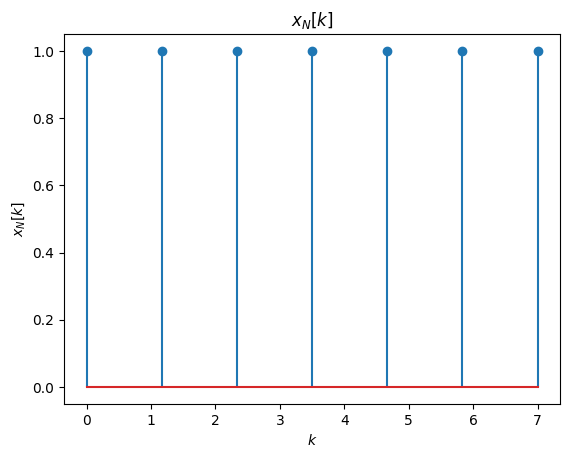

In [13]:
plot_signal(x_n, title="$x_N[k]$")

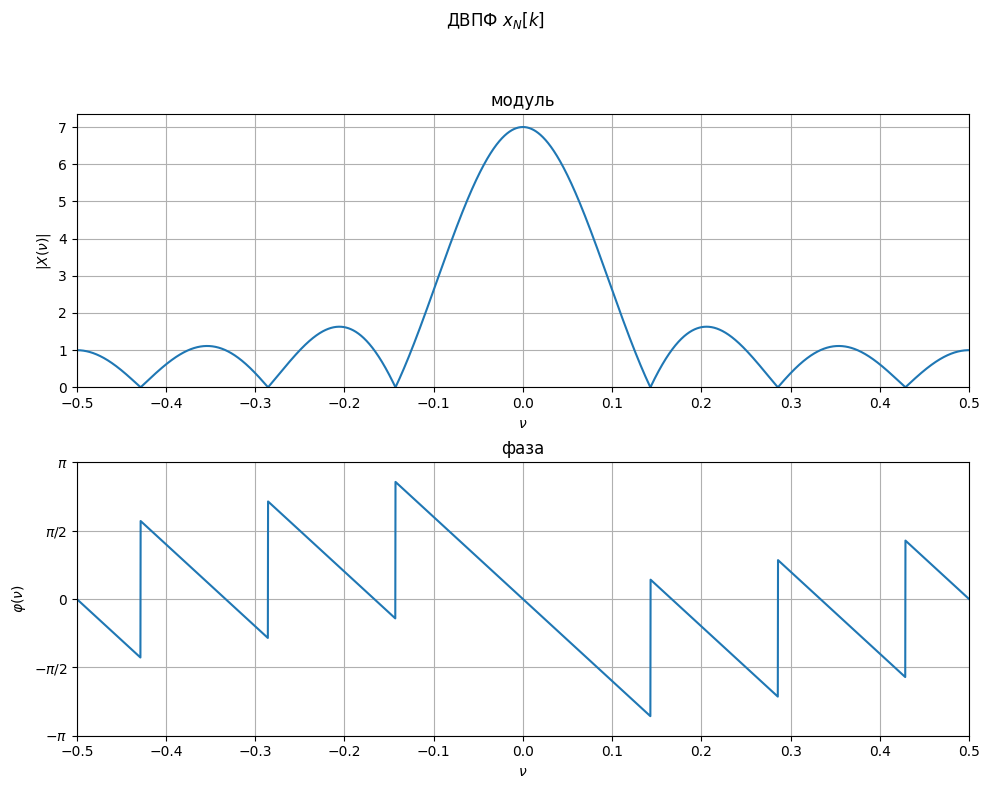

In [14]:
nu, X_n = dtft(x_n)
plt, axes = plot_dtft(X_n, nu, title="ДВПФ $x_N[k]$")
plt.show()

In [15]:
energy_square(X_n, nu)

print(np.sum(x_n**2)) # Равенство Парсеваля

Квадрат энергии: 6.999755862821887

7


In [16]:
value_at_zero(X_n, nu)
main_petal_width(X_n, nu)
phase_jumps(X_n, nu)

Значение X_N(0) = [7.]

Ширина главного лепестка: 0.28564453125

Скачок фазы: 
	nu -0.4287109375 -> -0.428466796875
	phi:-1.344 до 1.793
	на 0.9985 pi
Скачок фазы: 
	nu -0.285888671875 -> -0.28564453125
	phi:-0.8943 до 2.243
	на 0.9985 pi
Скачок фазы: 
	nu -0.14306640625 -> -0.142822265625
	phi:-0.4449 до 2.692
	на 0.9985 pi
Скачок фазы: 
	nu 0.142822265625 -> 0.14306640625
	phi:-2.692 до 0.4449
	на 0.9985 pi
Скачок фазы: 
	nu 0.28564453125 -> 0.285888671875
	phi:-2.243 до 0.8943
	на 0.9985 pi
Скачок фазы: 
	nu 0.428466796875 -> 0.4287109375
	phi:-1.793 до 1.344
	на 0.9985 pi



### Задача 1.2. Свойство масштабирования.

Рассмотрите последовательность $x_L[k ]$ , получаемую добавлением между каждой парой отсчетов

In [17]:
# # There was another way to get x_l:
# x_l = np.zeros((N - 1) * L + 1)
# for idx in range(len(x_l)):
#   if idx % L == 0:
#         x_l[idx] = 1

# x_l

x_l = np.array([x_l_generator(val) for val in range(0, (N - 1) * L + 1)])
x_l

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

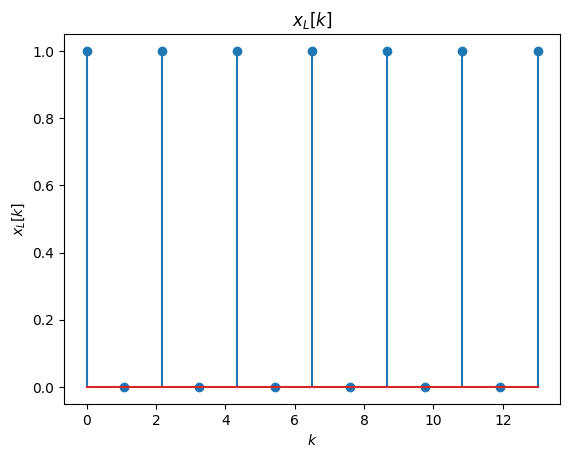

In [18]:
plot_signal(x_l, "$x_L[k]$")

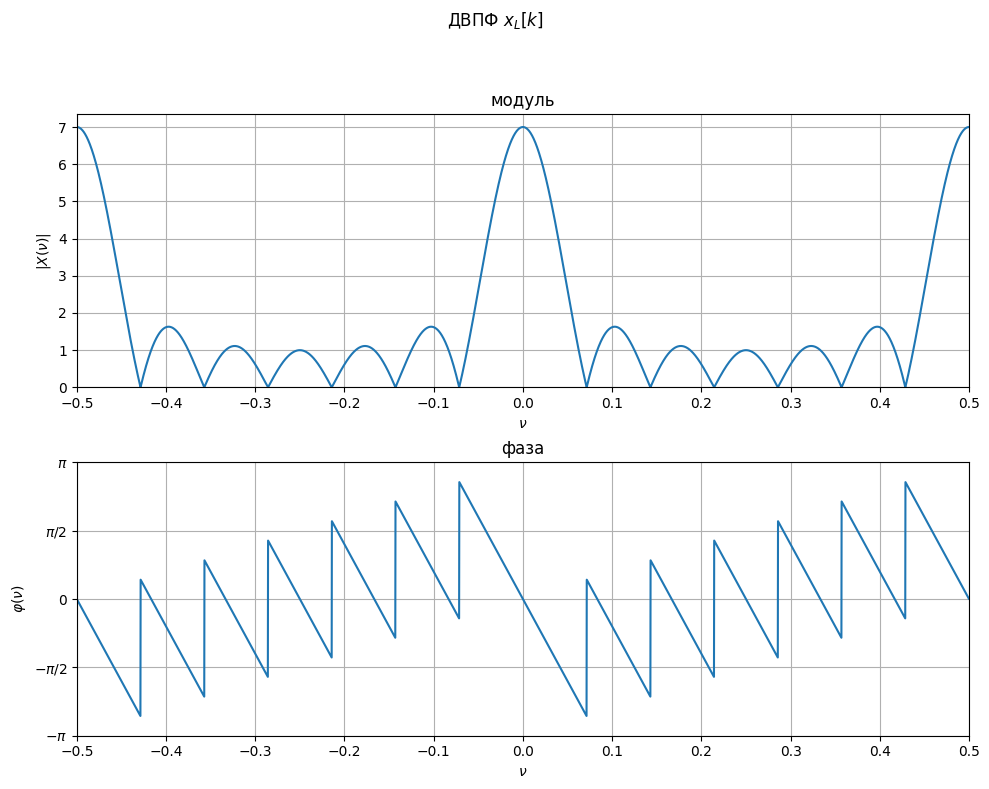

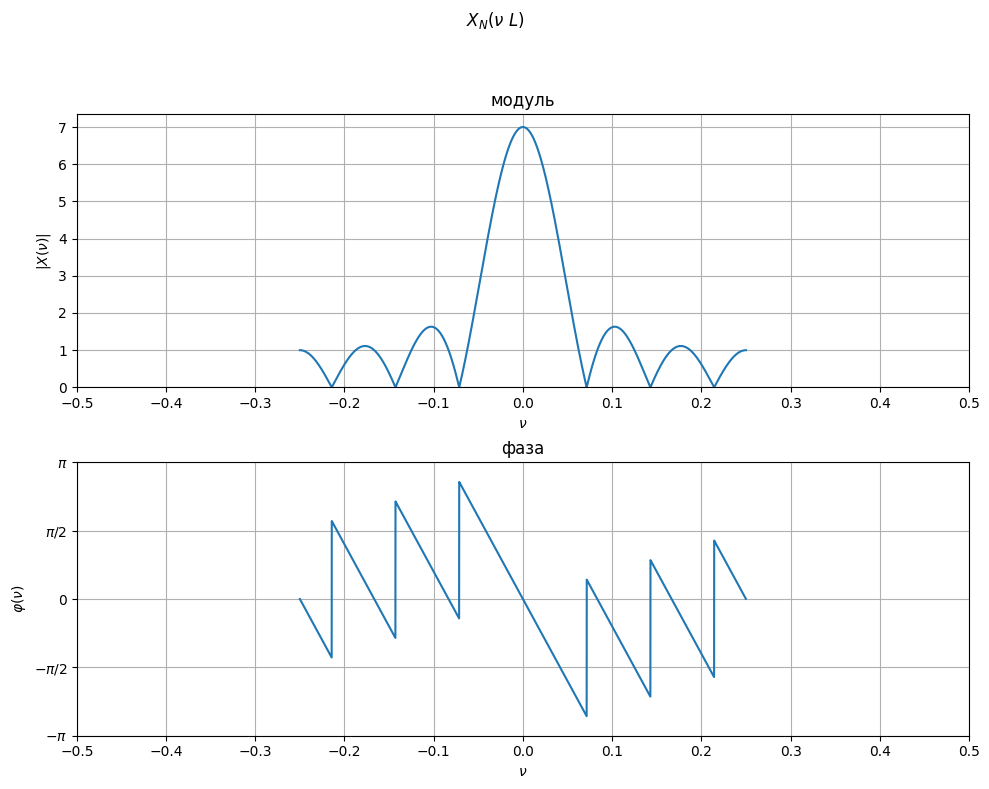

In [19]:
nu, X_l = dtft(x_l)
plt, axes = plot_dtft(X_l, nu, title="ДВПФ $x_L[k]$")
plt.show()

nu, X_n = dtft(x_n)
nu_L = nu / L # TODO why division?...
plt, axes = plot_dtft(X_n, nu_L, title="$X_N(\\nu \ L)$")
plt.show()

### Задача 1.3. Дифференцирование спектральной плотности.

Рассмотрите последовательность $x_D[k ] = kx_N [k ]$ . Постойте с помощью  моделирования график для модуля ДВПФ этой последовательности

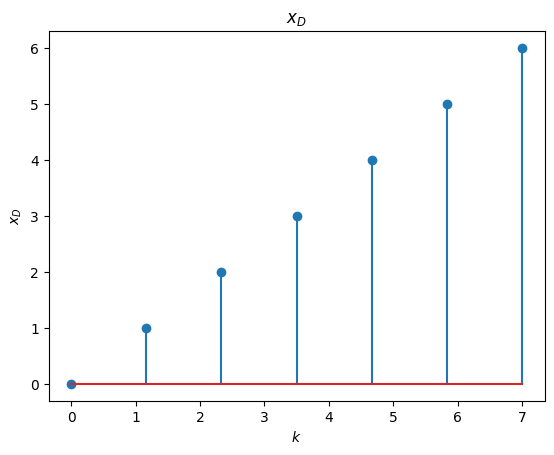

In [20]:
x_d = np.array([idx * x_n[idx] for idx in range(len(x_n))])
plot_signal(x_d, title="$x_D$")

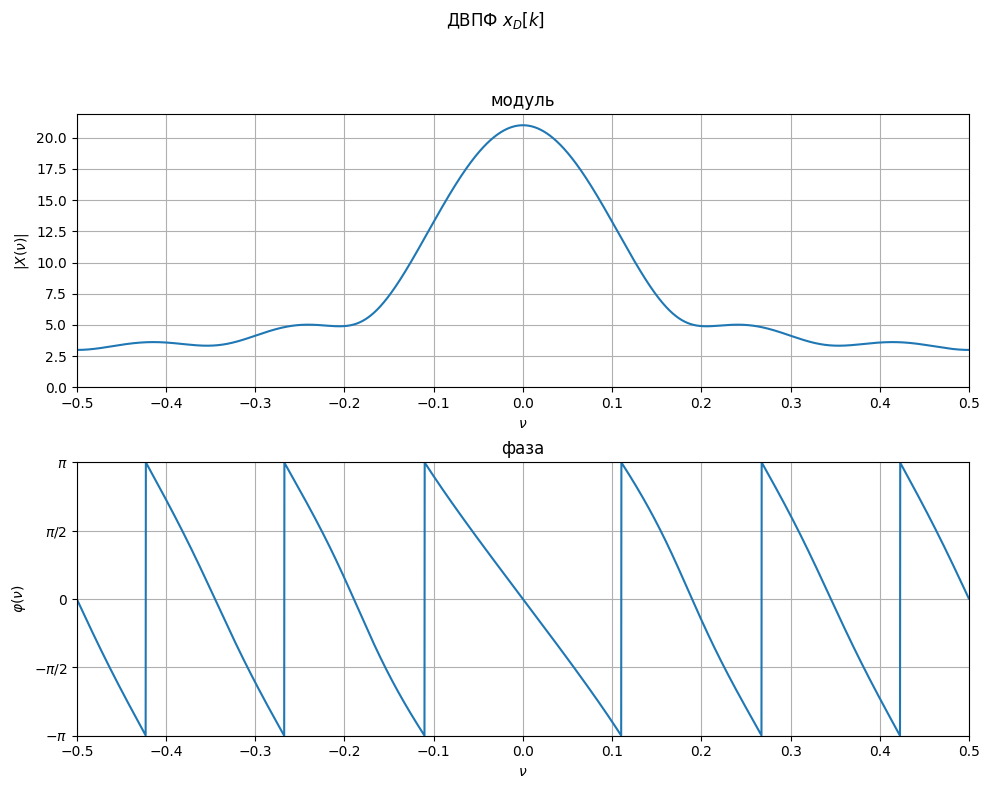

In [45]:
nu, X_d = dtft(x_d)
plt, axes = plot_dtft(X_d, nu, title="ДВПФ $x_D[k]$")
plt.show()


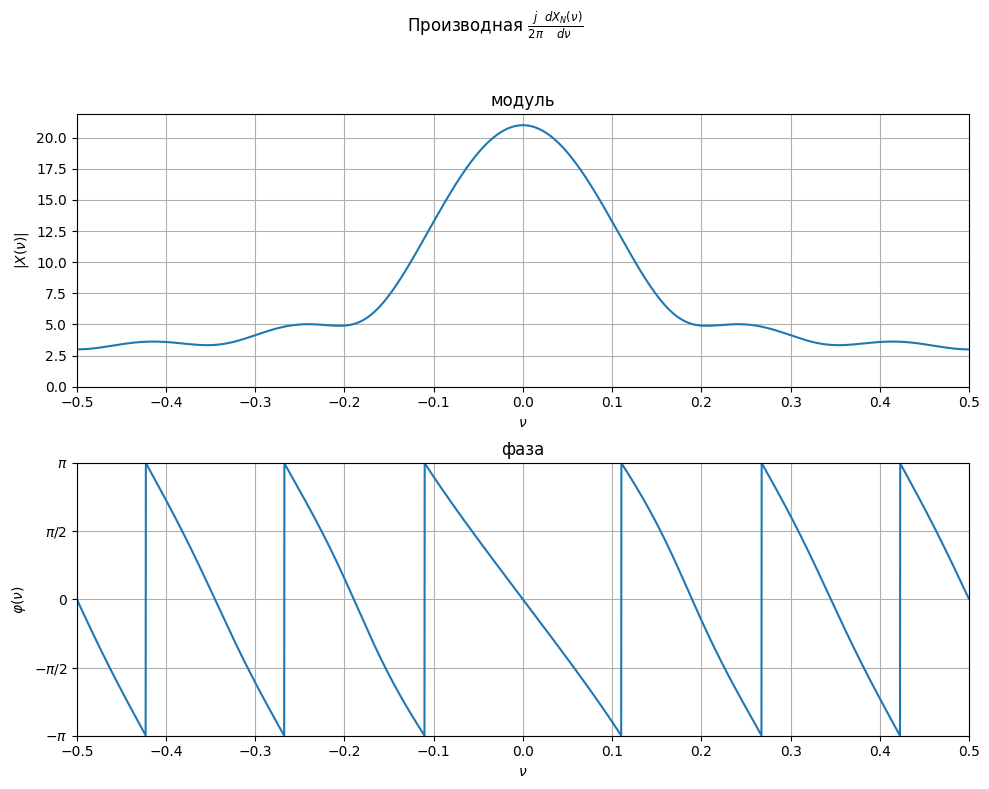

In [46]:
nu, X_n = dtft(x_n)
derivative = 1j / (2* np.pi) * np.gradient(X_n, nu) # TODO амплитуды
plt, axes = plot_dtft(derivative, nu, title="Производная $\\frac{j}{2\\pi}\\frac{dX_N(\\nu)}{d\\nu}$")
plt.show()

### Задача 1.4. Теорема смещения.

С помощью моделирования получите график модуля спектральной плотности $X_S(\nu)$ для сигнала $x_S[k ] = x_N[k ]\exp( j 2\pi\nu_0k)$

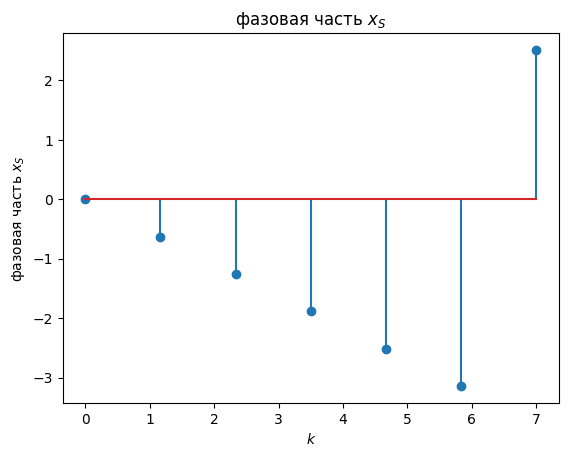

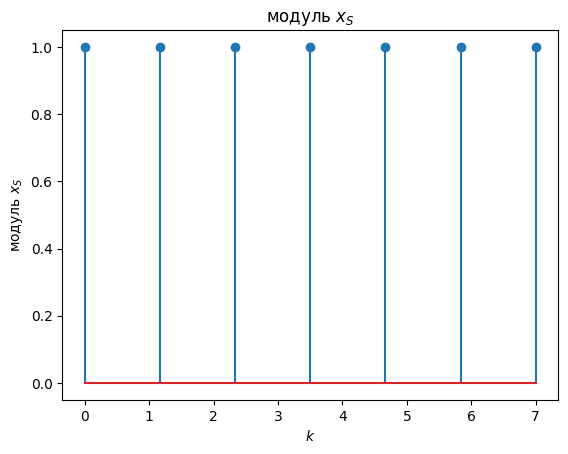

In [23]:
x_s = np.array([np.exp(1j*2*np.pi*nu_0*k)*x_n[k] for k in range(len(x_n))])
plot_signal(np.angle(x_s), title="фазовая часть $x_S$")
plot_signal(np.abs(x_s), title="модуль $x_S$")

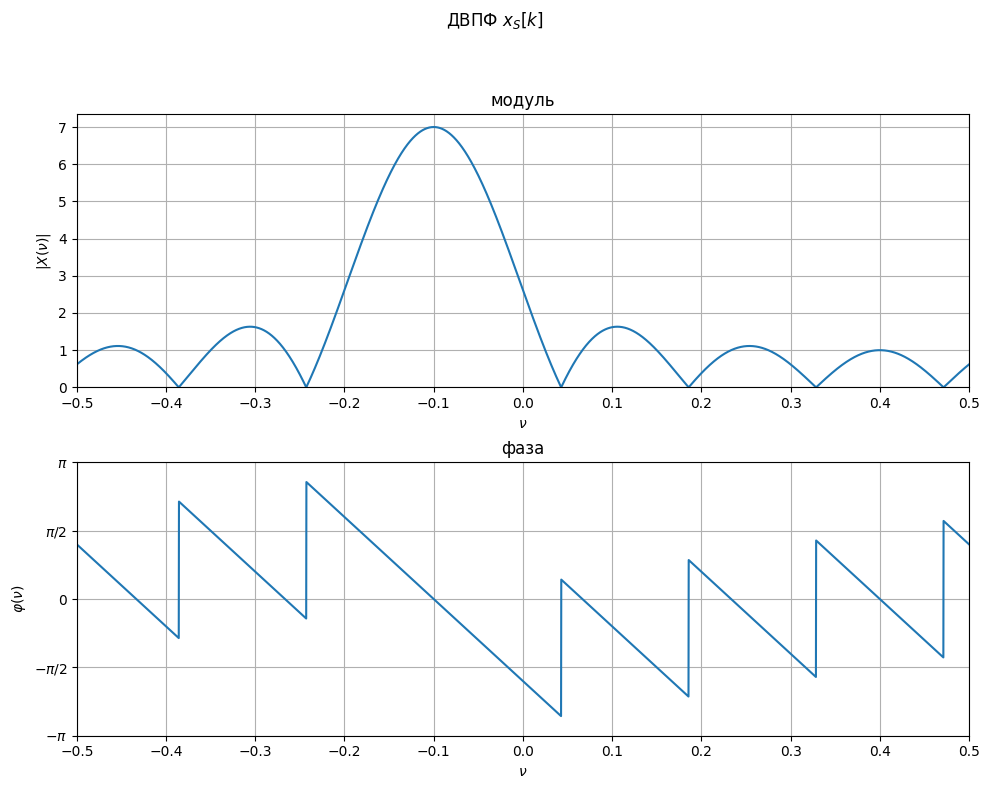

In [24]:
nu, X_s = dtft(x_s)
plt, axes = plot_dtft(X_s, nu, title="ДВПФ $x_S[k]$")
plt.show()

### Задача 1.5. Теорема о свертке во временной области.

Определите с помощью моделирования линейную дискретную свертку последовательности $x_N [k ]$ c точно такой же последовательностью. Постойте график для модуля ДВПФ.

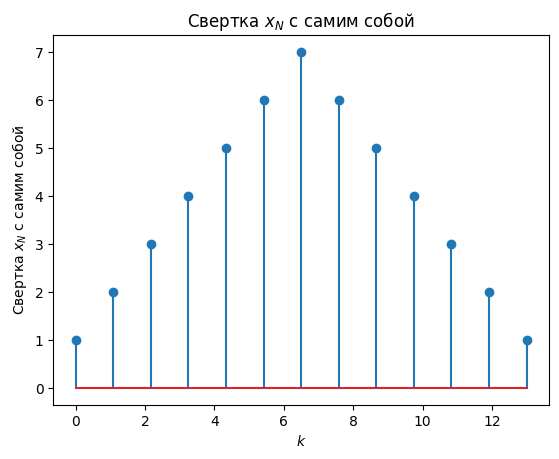

In [25]:
x_n_conv = signal.convolve(x_n, x_n)
plot_signal(x_n_conv, title="Свертка $x_N$ с самим собой")

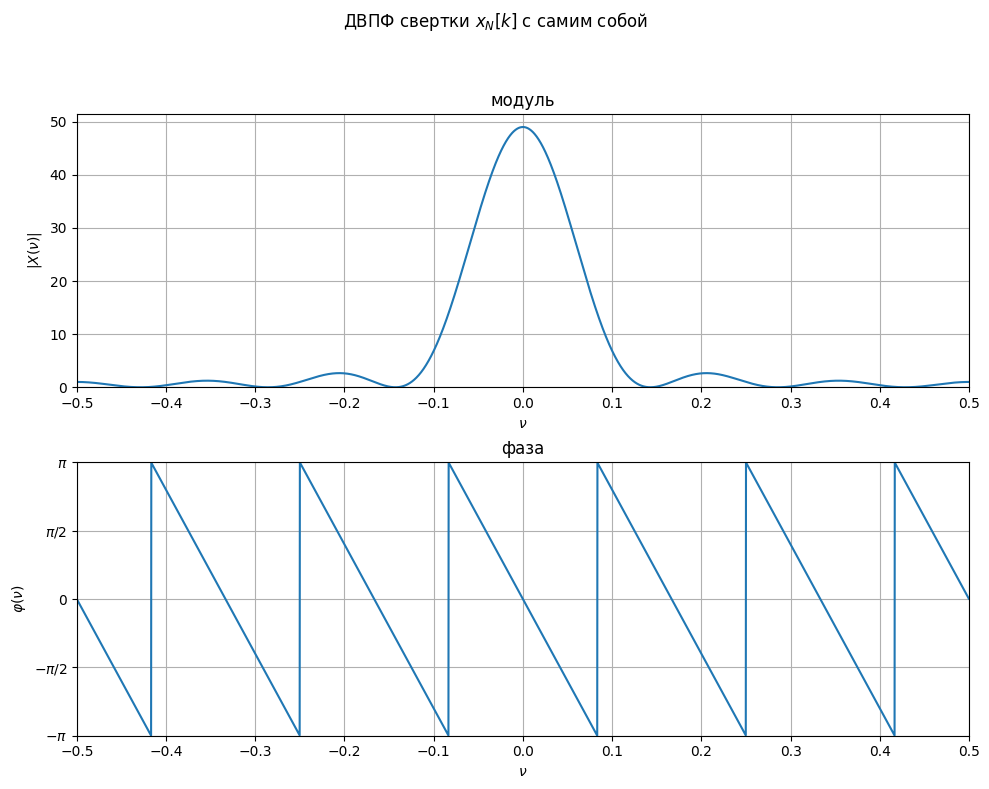

In [26]:
nu, X_n_conv = dtft(x_n_conv)
plt, axes = plot_dtft(X_n_conv, nu, title="ДВПФ свертки $x_N[k]$ с самим собой")
plt.show()

In [27]:
value_at_zero(X_n_conv, nu)
main_petal_width(X_n_conv, nu)
energy_square(X_n_conv, nu)

Значение X_N(0) = [49.]

Ширина главного лепестка: 0.2822265625

Квадрат энергии: 230.99975586626869



## Пункт 2

Вариант №4

### Значения:
$m = -3$
$k = \left\{1, -3, 2, 4, 1, 7, 1, 1\right\}$

In [60]:
m = -3
x = np.array([1, -3, 2, 4, 1, 7, 1, 1])
N = len(x)

### Задача 2.1. Алгоритмы вычисления ДПФ.

In [61]:
W_8 = dft(N)
Xn = W_8 @ x
print("Результат матричного ДПФ")
Xn

Результат матричного ДПФ


array([14.        +0.00000000e+00j, -9.19238816+3.94974747e+00j,
       -1.        +1.00000000e+00j,  9.19238816+5.94974747e+00j,
       -4.        -4.53119316e-15j,  9.19238816-5.94974747e+00j,
       -1.        -1.00000000e+00j, -9.19238816-3.94974747e+00j])

In [62]:
Yn = fft(x)
print("Результат БПФ")
Yn

Результат БПФ


array([14.        -0.j        , -9.19238816+3.94974747j,
       -1.        +1.j        ,  9.19238816+5.94974747j,
       -4.        -0.j        ,  9.19238816-5.94974747j,
       -1.        -1.j        , -9.19238816-3.94974747j])

In [63]:
# FFT chekcpoint
np.sum(x)

14

In [64]:
print("Сравнение полученных результатов")
max(abs(Yn-Xn))

Сравнение полученных результатов


8.188600426433445e-15

### Задача 2.2 Свойства симметрии ДПФ.

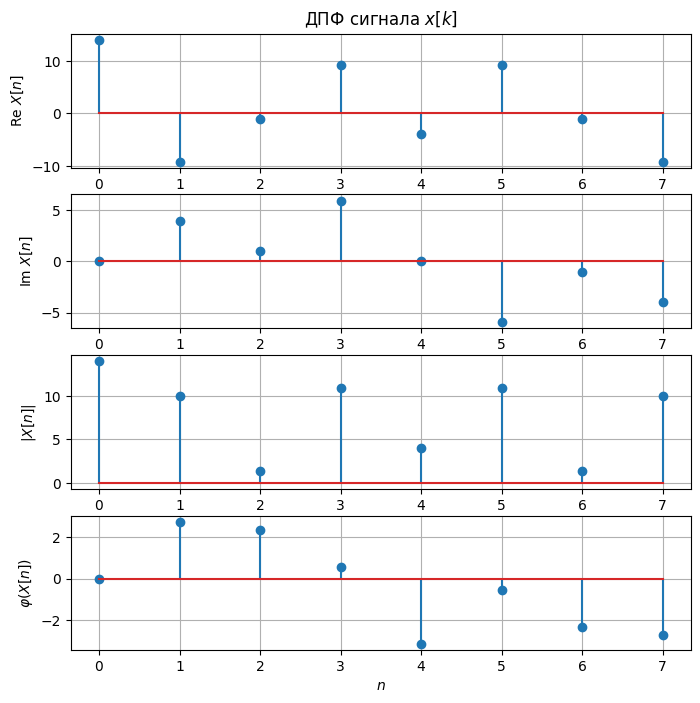

In [65]:
Xn = fft(x)
plot_dtf(Xn, N, 'ДПФ сигнала $x[k]$')


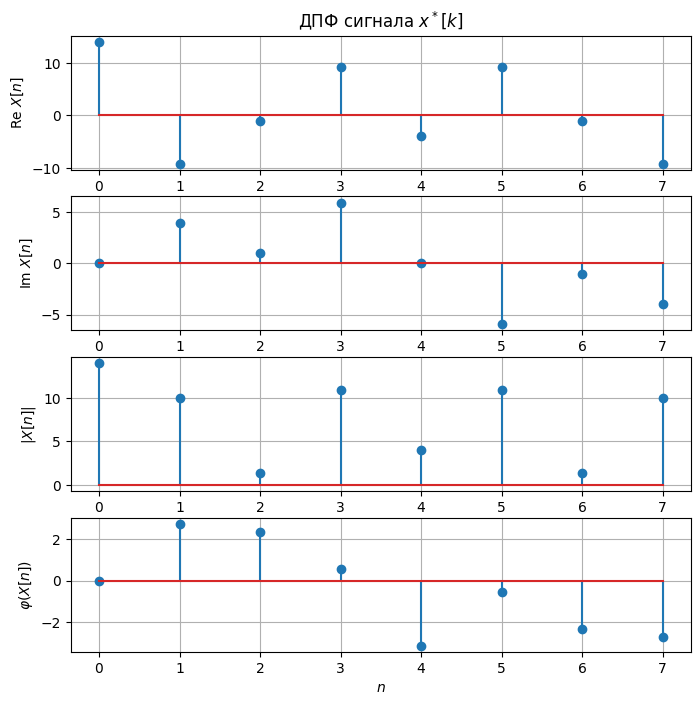

In [66]:
Xn_star = fft(np.conjugate(x))
plot_dtf(Xn, N, 'ДПФ сигнала $x^*[k]$')


### Задача 2.3. Циклический сдвиг в ДПФ.

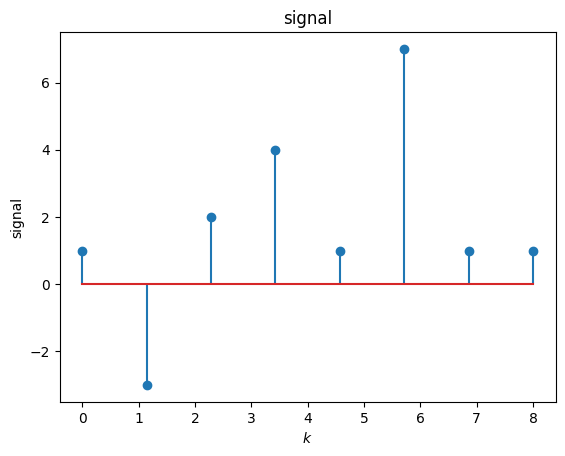

In [35]:
plot_signal(x)

In [36]:
W_8_inv = np.linalg.inv(W_8) # сдвиг
x_inv = W_8_inv @ Xn

print("Сравнение результата обратного преобразования через матричное ДПФ")
max(np.abs(x_inv - x))

Сравнение результата обратного преобразования через матричное ДПФ


1.5651267371351397e-15

In [37]:
y_inv = ifft(Yn)

print("Сравнение результата обратного преобразования БПФ ")
max(np.abs(y_inv - x))

Сравнение результата обратного преобразования БПФ 


8.881784197001252e-16

## Пункт 3

Вариант №4

### Значения:
$\begin{array}{cc}
m & m_0 \\
5 & -0.2
\end{array}$

In [47]:
m_1 = -0.2
m_0 = 4

### Задача 3.1. Интерполяция ДВПФ добавлением нулевых отсчетов в сигнал.

In [48]:
N = 32

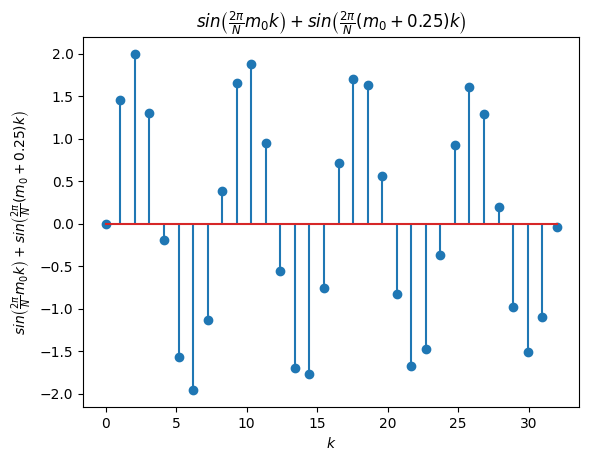

In [49]:
k = np.arange(N)
x_k = np.sin(2*np.pi*m_0*k      / N) + np.sin(2*np.pi/N * (m_0 + 0.25) * k)
plot_signal(x_k, "$sin\\left(\\frac{2\\pi}{N}m_0k\\right) + sin\\left(\\frac{2\\pi}{N}\\left(m_0 + 0.25\\right)k\\right)$")

Target num points: 32


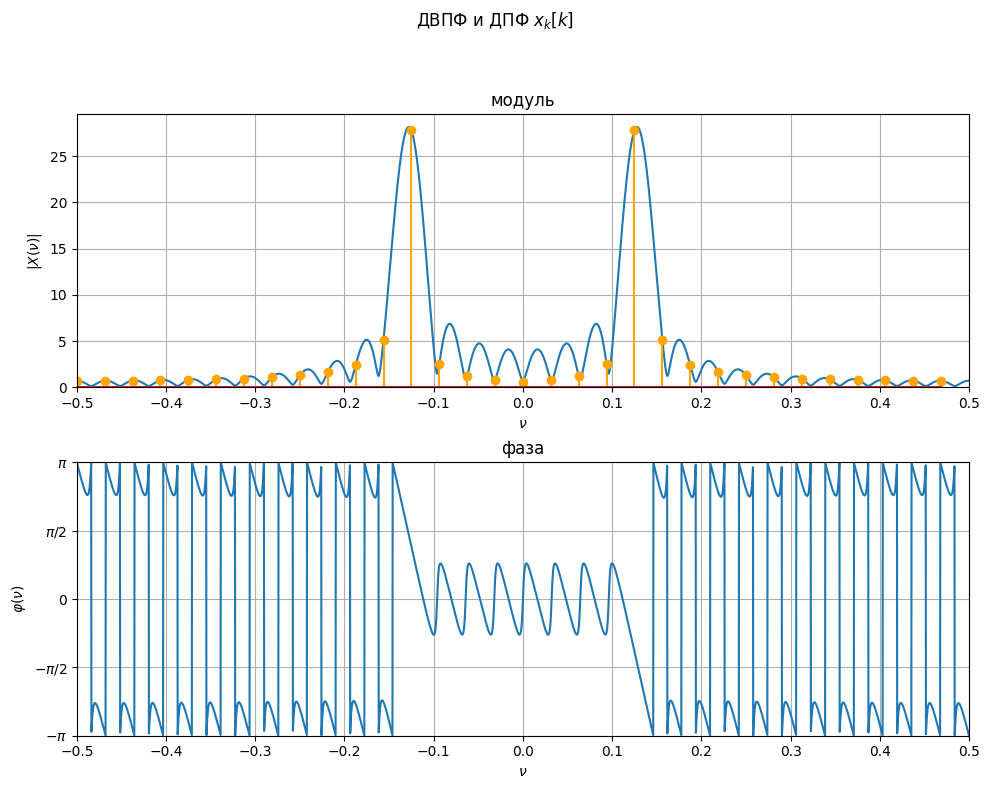

In [68]:
left_peak = m_0 / N
right_peak = (m_0 + 0.25) / N

target_num_points = int(1 / (right_peak - left_peak))
print(f"Target num points: {target_num_points}")
plot_dtf_dtft(x_k, f"ДВПФ и ДПФ $x_k[k]$", target_num_points)

### Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

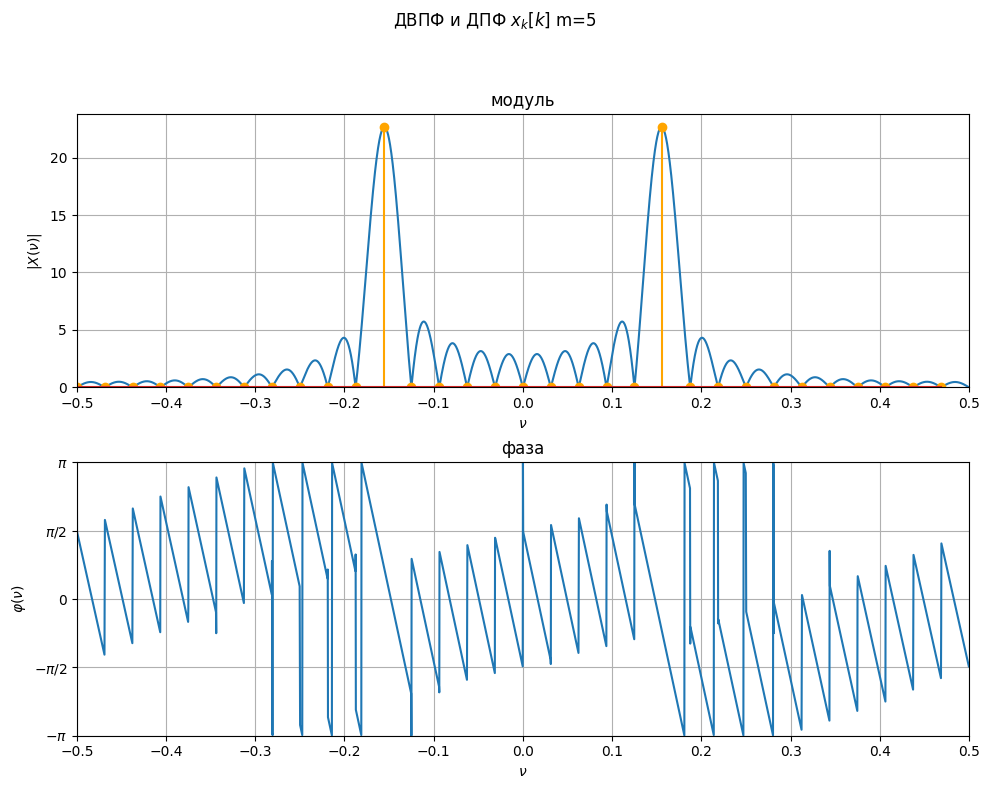

In [42]:
k = np.arange(N)

m = m_0
x_k1 = np.cos((2 * np.pi * m * k ) / N ) +  np.sin((2 * np.pi * m * k ) / N )
plot_dtf_dtft(x_k1, f"ДВПФ и ДПФ $x_k[k]$ m={m}", N)

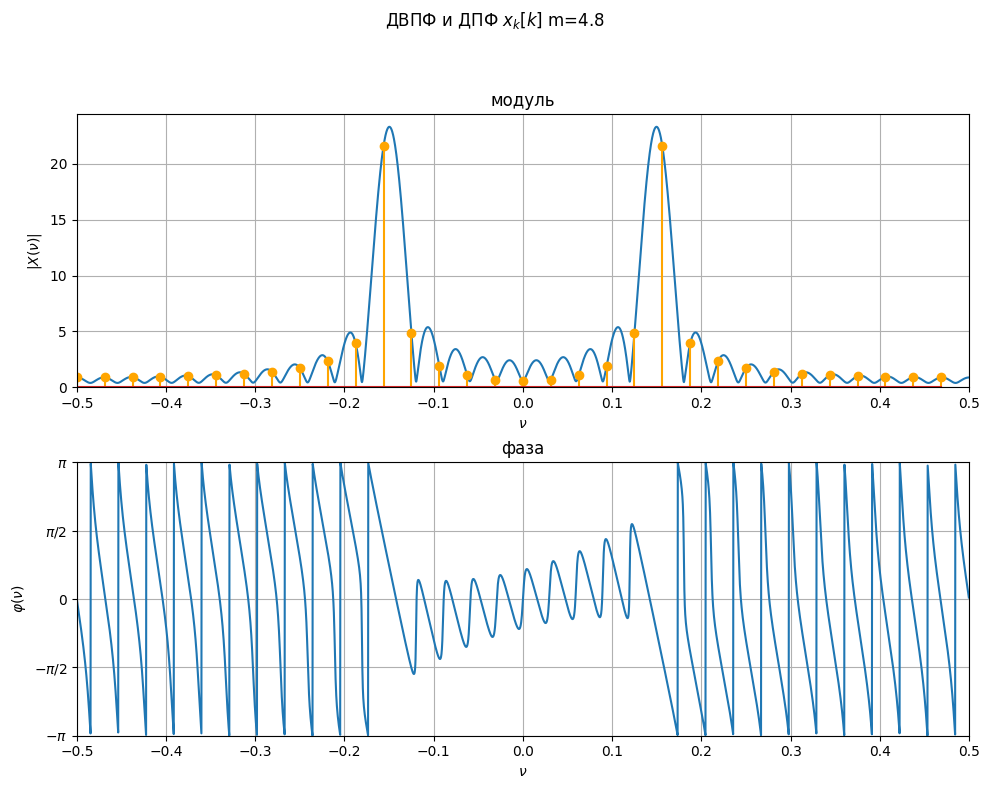

In [43]:
m = m_1 + m_0

x_k2 = np.cos((2 * np.pi * m * k ) / N ) +  np.sin((2 * np.pi * m * k ) / N )
plot_dtf_dtft(x_k2, f"ДВПФ и ДПФ $x_k[k]$ m={m}", N)